<a href="https://colab.research.google.com/github/pddiste/TimeSeries/blob/master/changeforest_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install changeforest

In [8]:
import numpy as np
  
Sigma = np.full((5, 5), 0.7)
np.fill_diagonal(Sigma, 1)
 
rng = np.random.default_rng(12)
X = np.concatenate(
    (
         rng.normal(0, 1, (200, 5)),
         rng.multivariate_normal(np.zeros(5), Sigma, 200),
         rng.normal(0, 1, (200, 5)),
    ),
    axis=0,
   )

In [9]:
from changeforest import changeforest
 
result = changeforest(X, "random_forest", "bs")
print(result)
print(result.split_points())

                    best_split max_gain p_value
(0, 600]                   419   11.695   0.005
 ¦--(0, 419]               200   54.751   0.005
 ¦   ¦--(0, 200]             6    -1.95    0.67
 ¦   °--(200, 419]         206  -16.876    0.61
 °--(419, 600]             591  -14.057       1
[200, 419]


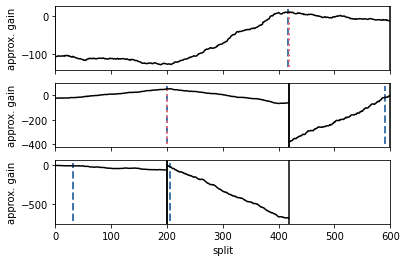

In [10]:
 result.plot().show()